# Project code

## Import libraries

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

## Connected to dataset using Mysql

In [2]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!')
print(connection)

In [3]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [4]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                  database='information_schema')

In [5]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

             Tables_in_information_schema
0                          CHARACTER_SETS
1                              COLLATIONS
2   COLLATION_CHARACTER_SET_APPLICABILITY
3                                 COLUMNS
4                       COLUMN_PRIVILEGES
..                                    ...
56                          INNODB_CMPMEM
57               INNODB_BUFFER_POOL_STATS
58                     INNODB_SYS_COLUMNS
59                     INNODB_SYS_FOREIGN
60                  INNODB_SYS_TABLESTATS

[61 rows x 1 columns]


In [6]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                  database='project_itsm')

In [7]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [8]:
type(db_tables)

pandas.core.frame.DataFrame

In [9]:
query = "select * from dataset_list" # SQL statement
dataset_list = pd.read_sql(query,connection)
print(dataset_list.shape)
dataset_list

(46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


## Dataset saved in Excel

In [10]:
dataset_list.to_excel('dataset_list.xlsx', index = False)

## Reading CSV file

In [11]:
data = pd.read_excel("dataset_list.xlsx")
data.to_csv("dataset_list.csv", index = None, header=True)
data = pd.read_csv("dataset_list.csv")
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


# Predicting High Priority Tickets

## Exploratory Data Analysis and Feature Engineering

In [12]:
data.shape

(46606, 25)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [14]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [15]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [16]:
data.duplicated().sum()

0

## Fill null values

In [17]:
f = lambda x: x.mode().iat[0] if x.notna().any() else np.nan

data['CI_Cat'] = data['CI_Cat'].fillna(data.groupby('Urgency')['CI_Cat'].transform(f))
data['CI_Subcat'] = data['CI_Subcat'].fillna(data.groupby('CI_Cat')['CI_Subcat'].transform(f))

## Replace values

In [18]:
print(data.Impact.unique())

data['Impact'] = data['Impact'].replace('NS', data['Impact'].mode()[0])

print(data.Impact.unique())

['4' '3' 'NS' '5' '2' '1']
['4' '3' '5' '2' '1']


In [19]:
data['Priority'] = data['Priority'].fillna(data.groupby(['Impact','Urgency'])['Priority'].transform(f))

print(data.Priority.unique())

[4. 3. 5. 2. 1.]


In [20]:
data['No_of_Reassignments'] = data['No_of_Reassignments'].fillna(data.groupby('CI_Cat')['No_of_Reassignments'].transform(f))

In [21]:
data['Urgency'] = data['Urgency'].replace('5 - Very Low',5)
print(data.Urgency.unique())

[4 3 5 2 1 '5' '3' '4' '2' '1']


In [22]:
data.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

## Count Number

In [23]:
from collections import Counter
Counter(data.CI_Cat).most_common()

[('application', 33003),
 ('subapplication', 7782),
 ('computer', 3651),
 ('storage', 703),
 ('hardware', 442),
 ('software', 333),
 ('database', 214),
 ('displaydevice', 212),
 ('officeelectronics', 152),
 ('networkcomponents', 107),
 ('applicationcomponent', 5),
 ('Phone', 2)]

In [24]:
Counter(data.CI_Subcat).most_common(10)

[('Server Based Application', 18914),
 ('Web Based Application', 15311),
 ('Desktop Application', 3876),
 ('Laptop', 1929),
 ('SAP', 1199),
 ('Banking Device', 916),
 ('Citrix', 767),
 ('SAN', 549),
 ('Client Based Application', 492),
 ('Desktop', 423)]

In [25]:
Counter(data.WBS).most_common(10)

[('WBS000073', 13342),
 ('WBS000091', 2500),
 ('WBS000263', 2283),
 ('WBS000072', 2197),
 ('WBS000271', 1186),
 ('WBS000095', 1102),
 ('WBS000318', 1099),
 ('WBS000152', 1076),
 ('WBS000094', 861),
 ('WBS000146', 858)]

In [26]:
Counter(data.Category).most_common()

[('incident', 37748),
 ('request for information', 8846),
 ('complaint', 11),
 ('request for change', 1)]

In [27]:
Counter(data.Priority).most_common()

[(4.0, 22749), (5.0, 16486), (3.0, 6671), (2.0, 697), (1.0, 3)]

<Figure size 1000x1000 with 0 Axes>

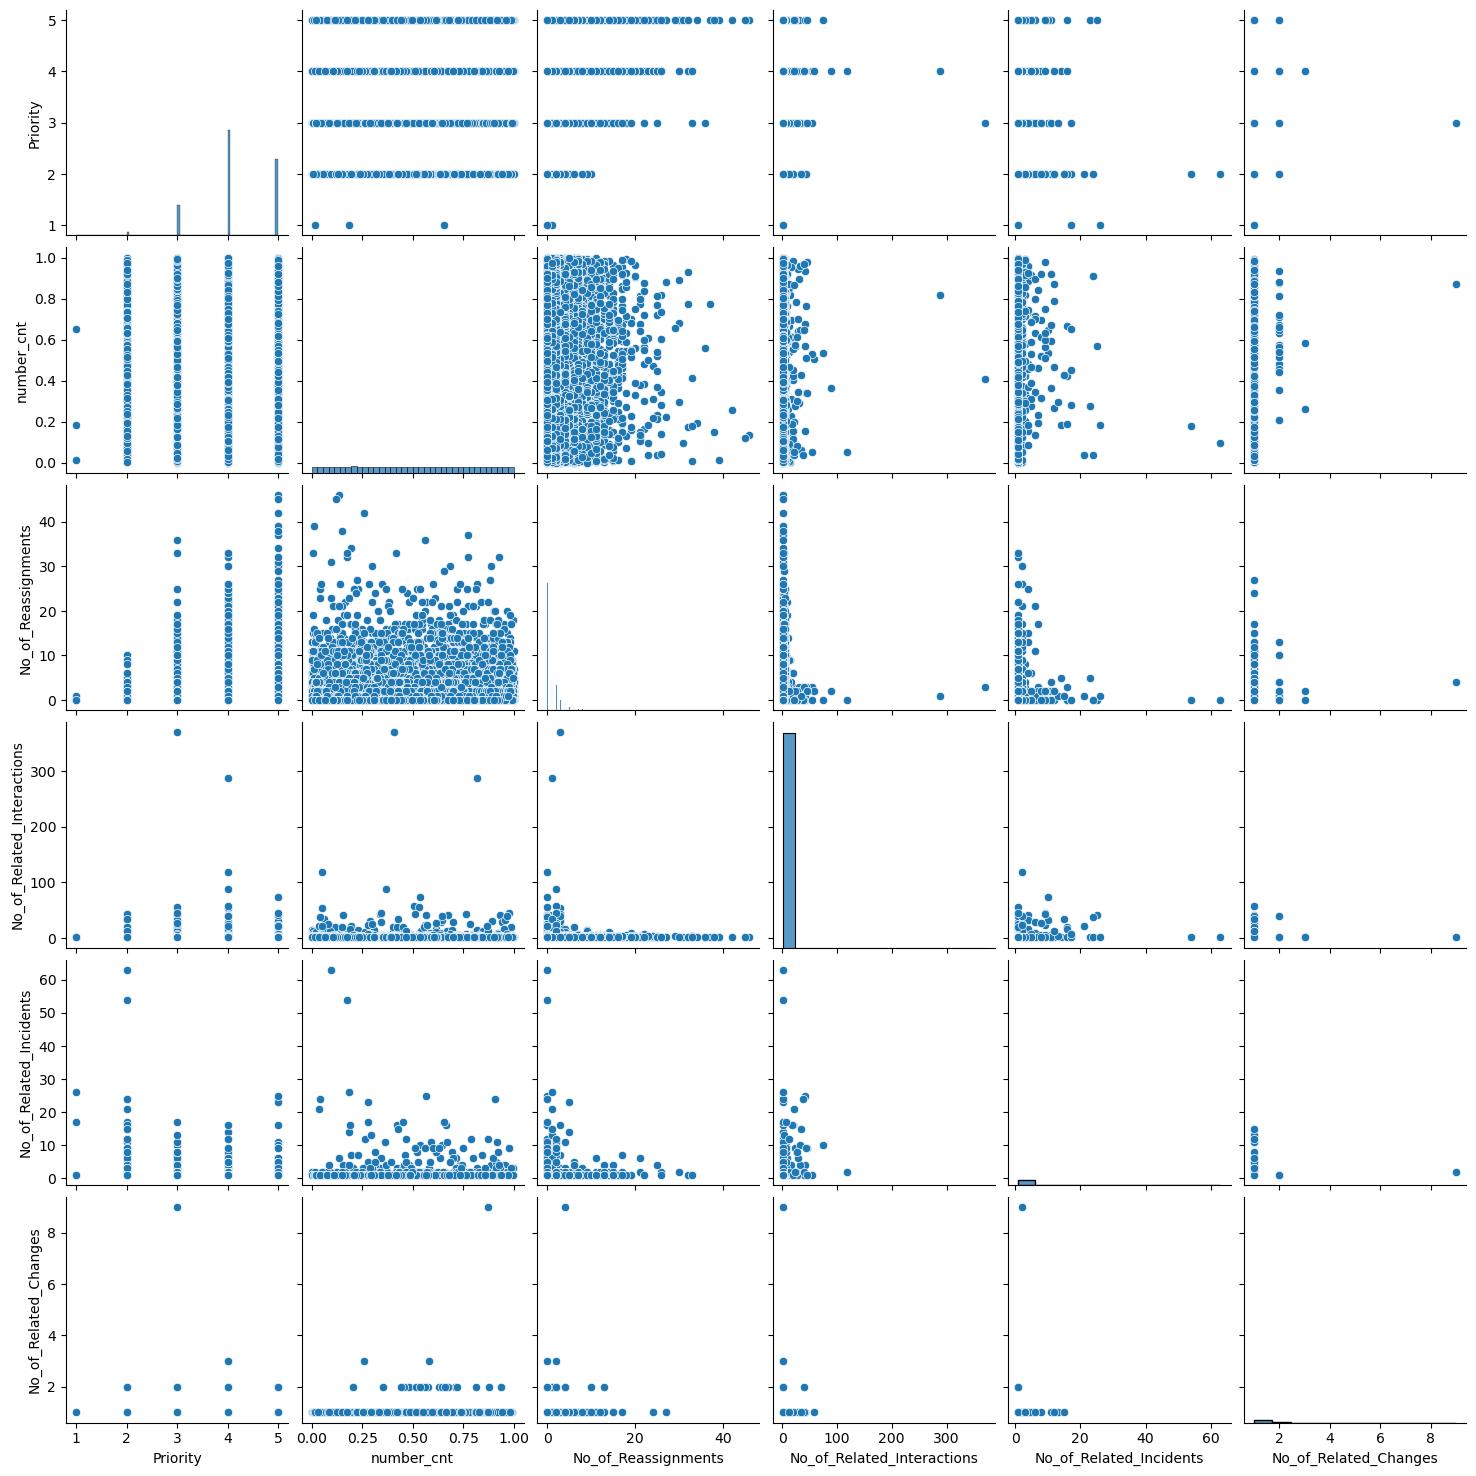

In [28]:
plt.figure(figsize=(10,10))
import seaborn as sb
sb.pairplot(data)

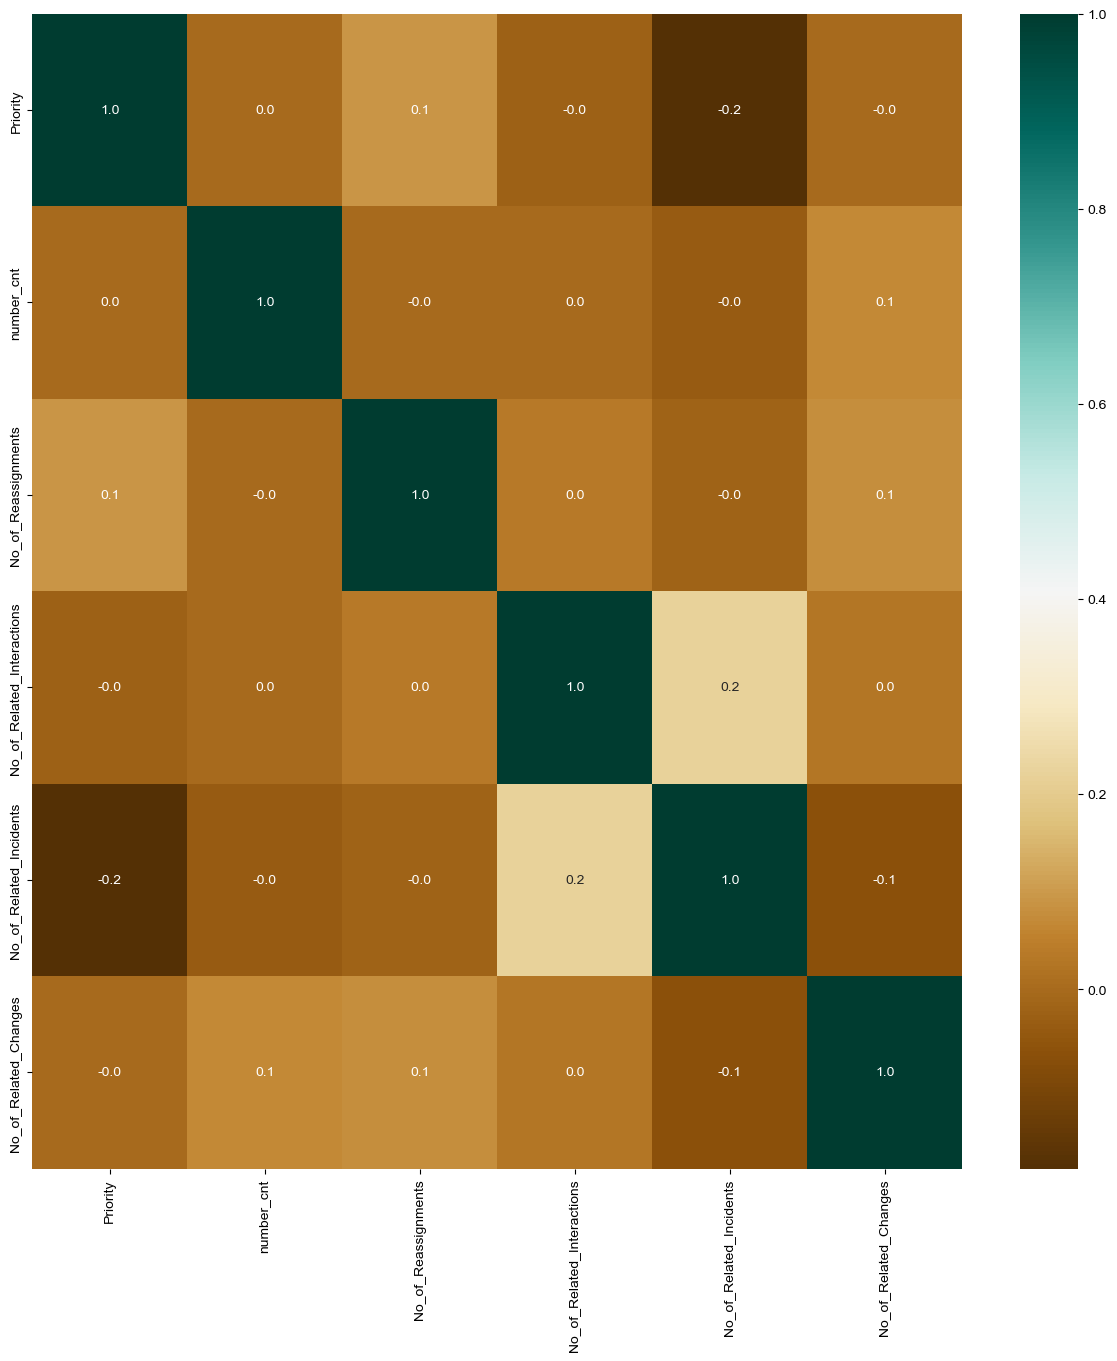

In [29]:
plt.figure(figsize=(15, 15))
sb.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sb.set(font_scale=0.25)
plt.show()

### Priority data of 1

In [30]:
df1 = data[data.Priority == (1)]
df1

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
34301,SUB000282,subapplication,Server Based Application,WBS000295,IM0034604,Closed,1,1,1.0,0.014412,...,12-02-2014 12:00,12-02-2014 12:01,12-02-2014 12:01,"3,02,66,11,111",Hardware,1.0,SD0104939,1.0,1.0,C00013982
35098,SUB000508,subapplication,Web Based Application,WBS000162,IM0035403,Closed,1,1,1.0,0.182814,...,12-02-2014 12:02,12-02-2014 12:03,12-02-2014 12:03,"2,34,48,33,333",Software,1.0,SD0107440,26.0,NaN,NaN
36711,WBA000082,application,Web Based Application,WBS000055,IM0037024,Closed,1,1,1.0,0.653794,...,17-02-2014 11:51,17-02-2014 11:54,17-02-2014 11:54,"16,975",Other,2.0,#MULTIVALUE,17.0,NaN,NaN


### Priority data of 2

In [31]:
df2 = data[data.Priority == (2)]
df2

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
849,WSR000008,computer,Windows Server,WBS000102,IM0000944,Closed,2,2,2.0,0.798444,...,NaN,01-10-2013 18:20,01-10-2013 18:23,"2,43,70,27,778",User error,1.0,SD0001198,NaN,1.0,C00000517
1126,WBA000124,application,Web Based Application,WBS000088,IM0001225,Closed,2,2,2.0,0.509363,...,NaN,NaN,01-10-2013 15:34,"7,27,05,55,556",Other,1.0,SD0001639,NaN,NaN,NaN
1128,OVR000033,computer,Laptop,WBS000118,IM0001227,Closed,2,2,2.0,0.647833,...,NaN,NaN,01-10-2013 09:14,"0,807777778",Operator error,1.0,SD0001642,NaN,1.0,C00001549
1129,WBA000124,application,Web Based Application,WBS000088,IM0001228,Closed,2,2,2.0,0.734261,...,NaN,NaN,01-10-2013 15:34,"7,11,27,77,778",Other,1.0,SD0001641,NaN,NaN,NaN
1185,CBD000911,computer,Banking Device,WBS000146,IM0001285,Closed,2,2,2.0,0.570667,...,01-10-2013 12:56,01-10-2013 12:57,01-10-2013 12:57,"2,77,52,77,778",Other,1.0,SD0001738,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46362,SBA000263,application,Server Based Application,WBS000072,IM0046810,Closed,2,2,2.0,0.736677,...,NaN,28-03-2014 15:41,28-03-2014 15:41,"1,86,22,22,222",Other,1.0,SD0145642,NaN,NaN,NaN
46386,APP000005,application,Citrix,WBS000335,IM0046835,Closed,2,2,2.0,0.514474,...,NaN,30-03-2014 03:19,30-03-2014 03:19,"0,5375",Software,1.0,SD0146035,NaN,NaN,NaN
46416,WBA000011,application,Web Based Application,WBS000152,IM0046865,Closed,3,1,2.0,0.870740,...,NaN,31-03-2014 12:04,31-03-2014 12:05,"4,07",Software,12.0,#MULTIVALUE,12.0,1.0,C00000385
46482,SWT000008,networkcomponents,Switch,WBS000281,IM0046932,Closed,2,2,2.0,0.316205,...,NaN,31-03-2014 14:51,31-03-2014 14:52,"1,88,80,55,556",No error - works as designed,1.0,SD0146305,NaN,NaN,NaN


In [32]:
df = df2.append(df1)
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
849,WSR000008,computer,Windows Server,WBS000102,IM0000944,Closed,2,2,2.0,0.798444,...,NaN,01-10-2013 18:20,01-10-2013 18:23,"2,43,70,27,778",User error,1.0,SD0001198,NaN,1.0,C00000517
1126,WBA000124,application,Web Based Application,WBS000088,IM0001225,Closed,2,2,2.0,0.509363,...,NaN,NaN,01-10-2013 15:34,"7,27,05,55,556",Other,1.0,SD0001639,NaN,NaN,NaN
1128,OVR000033,computer,Laptop,WBS000118,IM0001227,Closed,2,2,2.0,0.647833,...,NaN,NaN,01-10-2013 09:14,"0,807777778",Operator error,1.0,SD0001642,NaN,1.0,C00001549
1129,WBA000124,application,Web Based Application,WBS000088,IM0001228,Closed,2,2,2.0,0.734261,...,NaN,NaN,01-10-2013 15:34,"7,11,27,77,778",Other,1.0,SD0001641,NaN,NaN,NaN
1185,CBD000911,computer,Banking Device,WBS000146,IM0001285,Closed,2,2,2.0,0.570667,...,01-10-2013 12:56,01-10-2013 12:57,01-10-2013 12:57,"2,77,52,77,778",Other,1.0,SD0001738,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46482,SWT000008,networkcomponents,Switch,WBS000281,IM0046932,Closed,2,2,2.0,0.316205,...,NaN,31-03-2014 14:51,31-03-2014 14:52,"1,88,80,55,556",No error - works as designed,1.0,SD0146305,NaN,NaN,NaN
46551,DTA000025,application,Desktop Application,WBS000330,IM0047003,Closed,2,2,2.0,0.703717,...,NaN,31-03-2014 13:16,31-03-2014 13:16,"0,852777778",Operator error,1.0,SD0146602,NaN,NaN,NaN
34301,SUB000282,subapplication,Server Based Application,WBS000295,IM0034604,Closed,1,1,1.0,0.014412,...,12-02-2014 12:00,12-02-2014 12:01,12-02-2014 12:01,"3,02,66,11,111",Hardware,1.0,SD0104939,1.0,1.0,C00013982
35098,SUB000508,subapplication,Web Based Application,WBS000162,IM0035403,Closed,1,1,1.0,0.182814,...,12-02-2014 12:02,12-02-2014 12:03,12-02-2014 12:03,"2,34,48,33,333",Software,1.0,SD0107440,26.0,NaN,NaN


In [33]:
df.loc[:,['CI_Cat','CI_Subcat','WBS','Category','Closure_Code','Priority']]

,CI_Cat,CI_Subcat,WBS,Category,Closure_Code,Priority
849,computer,Windows Server,WBS000102,incident,User error,2.0
1126,application,Web Based Application,WBS000088,incident,Other,2.0
1128,computer,Laptop,WBS000118,incident,Operator error,2.0
1129,application,Web Based Application,WBS000088,incident,Other,2.0
1185,computer,Banking Device,WBS000146,incident,Other,2.0
...,...,...,...,...,...,...
46482,networkcomponents,Switch,WBS000281,request for information,No error - works as designed,2.0
46551,application,Desktop Application,WBS000330,incident,Operator error,2.0
34301,subapplication,Server Based Application,WBS000295,incident,Hardware,1.0
35098,subapplication,Web Based Application,WBS000162,incident,Software,1.0


## LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.CI_Cat = enc.fit_transform(data.CI_Cat)
data.CI_Subcat = enc.fit_transform(data.CI_Subcat)
data.WBS = enc.fit_transform(data.WBS)
data.Category = enc.fit_transform(data.Category)
data.Closure_Code = enc.fit_transform(data.Closure_Code)
data.KB_number = enc.fit_transform(data.KB_number)

In [35]:
m = data.loc[:,['CI_Cat','CI_Subcat','WBS','Closure_Code','Category','No_of_Reassignments','KB_number','number_cnt','Priority']]
m.head(2)

,CI_Cat,CI_Subcat,WBS,Closure_Code,Category,No_of_Reassignments,KB_number,number_cnt,Priority
0,11,57,137,6,1,26.0,413,0.601292,4.0
1,1,57,70,10,1,33.0,456,0.415050,3.0


<AxesSubplot:>

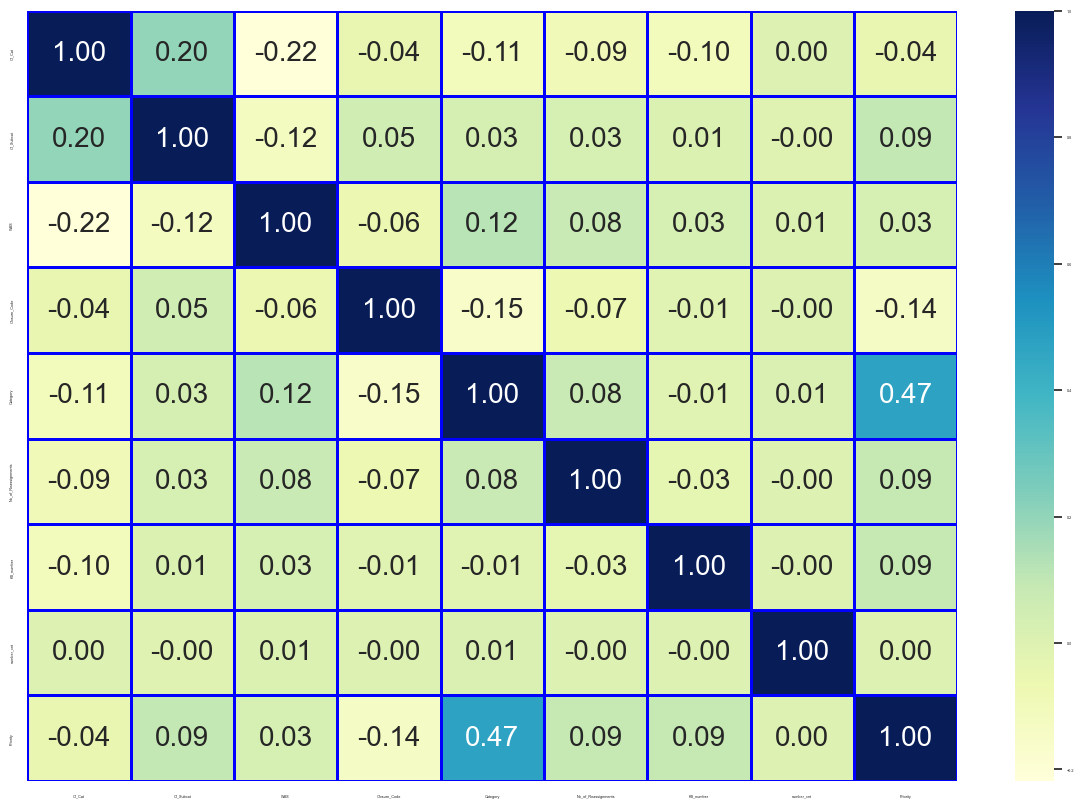

In [36]:
corrmatrix=m.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corrmatrix,linewidths=0.8,linecolor='blue',cmap="YlGnBu",annot=True, fmt=".2f", annot_kws={"size":20})

In [37]:
corr_matrix = data.corr()
corr_matrix["Priority"].sort_values(ascending=False)

Priority                      1.000000
Category                      0.474004
CI_Subcat                     0.091808
No_of_Reassignments           0.090157
KB_number                     0.086901
WBS                           0.026781
number_cnt                    0.000496
No_of_Related_Changes        -0.002834
No_of_Related_Interactions   -0.023055
CI_Cat                       -0.043036
Closure_Code                 -0.135425
No_of_Related_Incidents      -0.184003
Name: Priority, dtype: float64

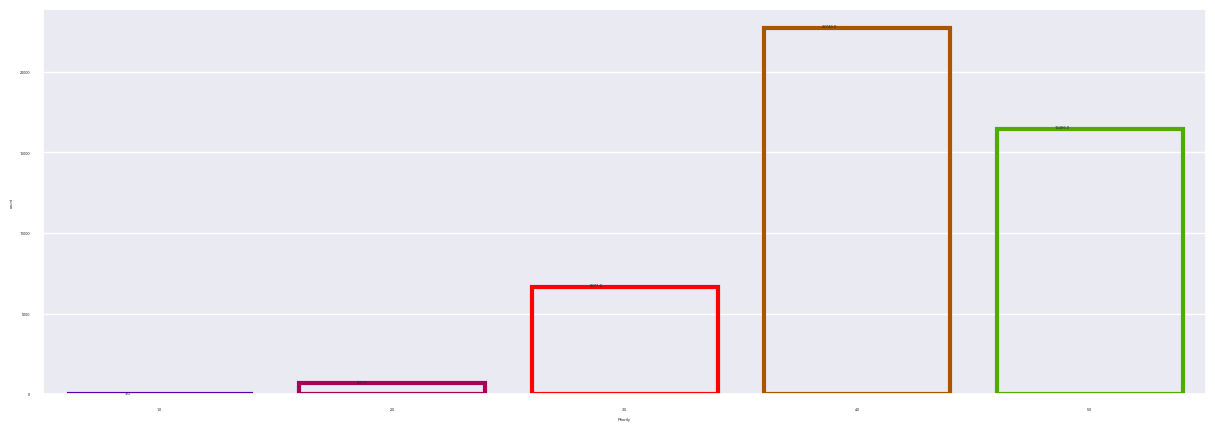

In [38]:
plt.figure(figsize=(15,5))
xyz = sb.countplot(x ='Priority', data = data,color="blue", facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sb.color_palette("brg", 5))
for p in xyz.patches:
   xyz.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<AxesSubplot:xlabel='CI_Cat', ylabel='Density'>

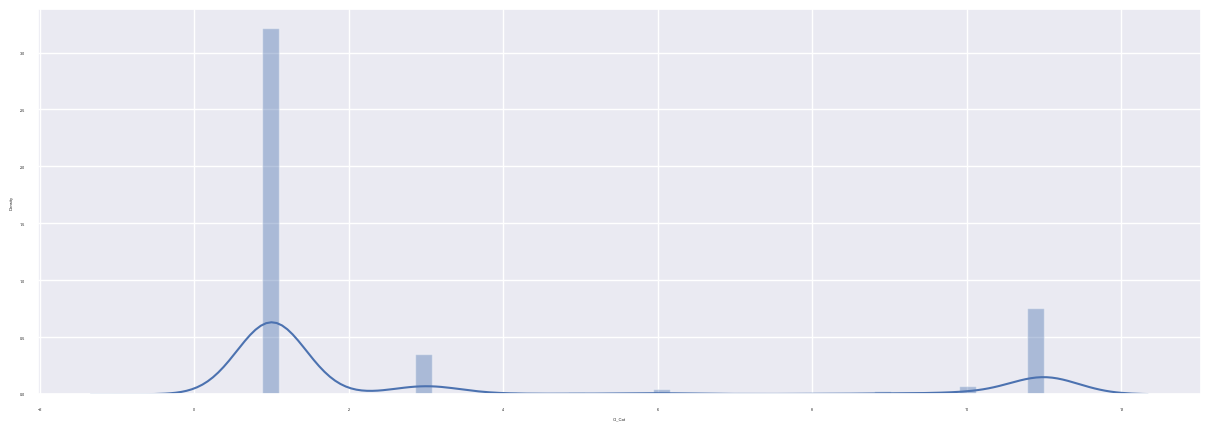

In [39]:
plt.figure(figsize=(15,5))
sb.distplot(data['CI_Cat'])

<AxesSubplot:xlabel='CI_Subcat', ylabel='Density'>

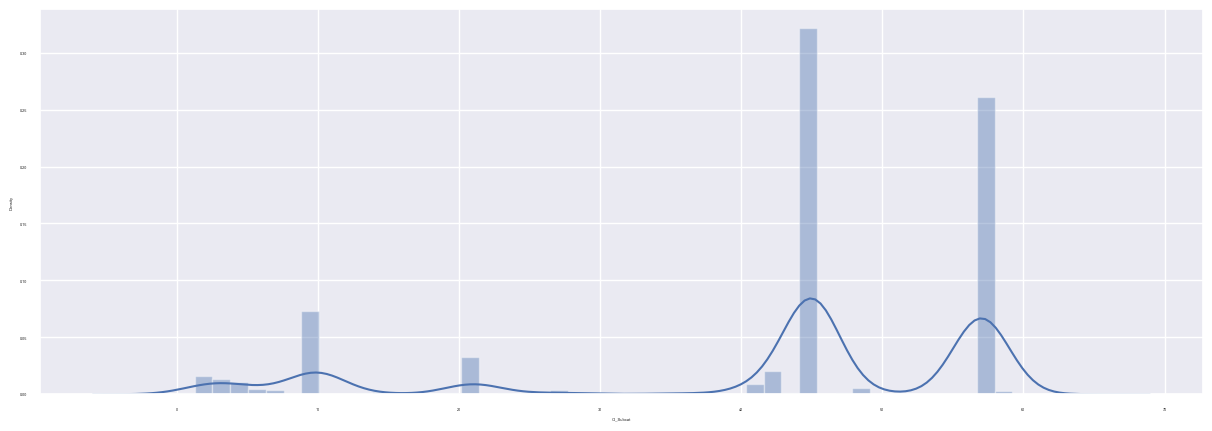

In [40]:
plt.figure(figsize=(15,5))
sb.distplot(data['CI_Subcat'])

<AxesSubplot:xlabel='WBS', ylabel='Density'>

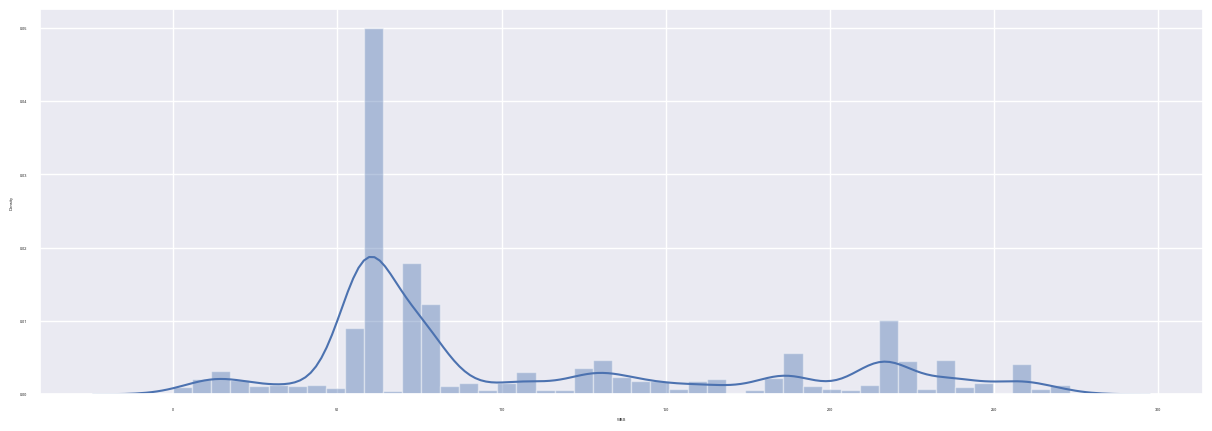

In [41]:
plt.figure(figsize=(15,5))
sb.distplot(data['WBS'])

<AxesSubplot:xlabel='Closure_Code', ylabel='Density'>

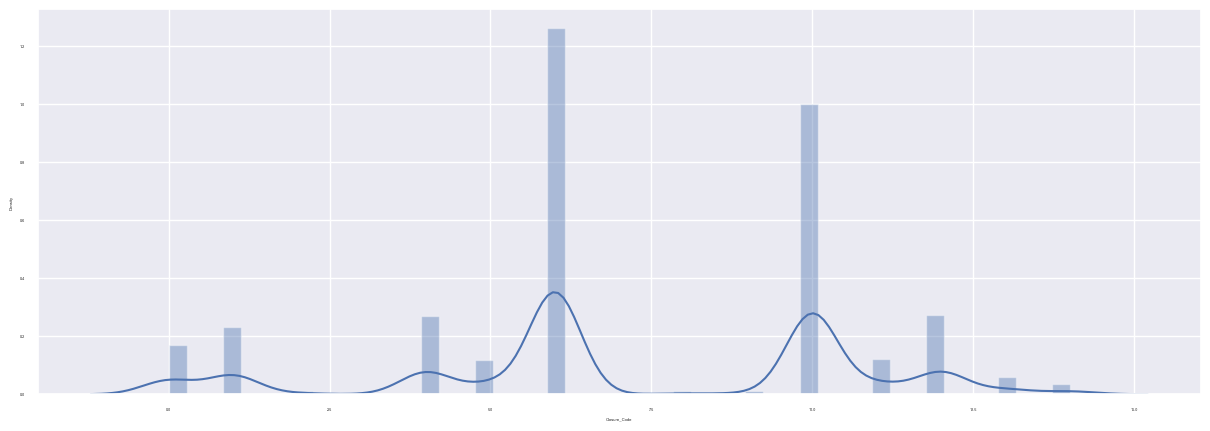

In [42]:
plt.figure(figsize=(15,5))
sb.distplot(data['Closure_Code'])

<AxesSubplot:xlabel='Category', ylabel='Density'>

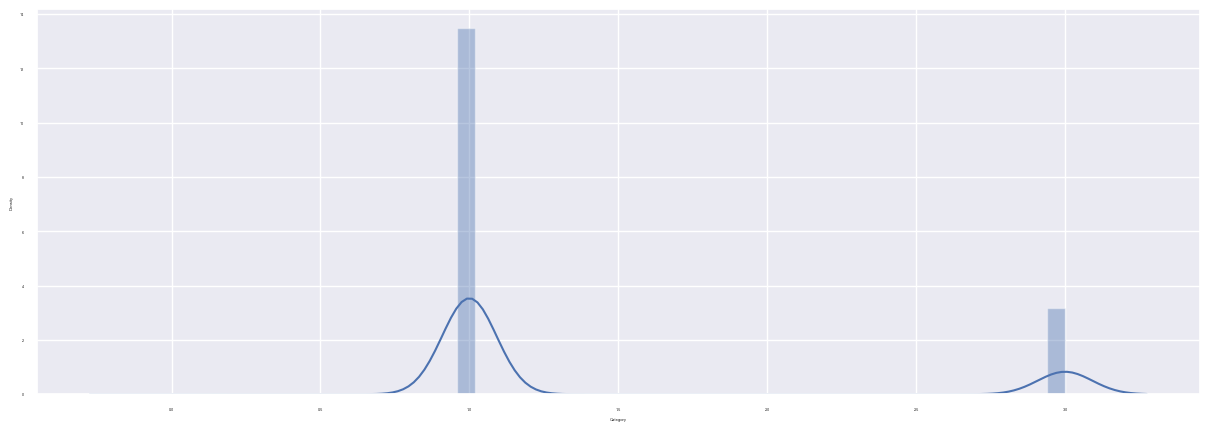

In [43]:
plt.figure(figsize=(15,5))
sb.distplot(data['Category'])

<AxesSubplot:xlabel='No_of_Reassignments', ylabel='Density'>

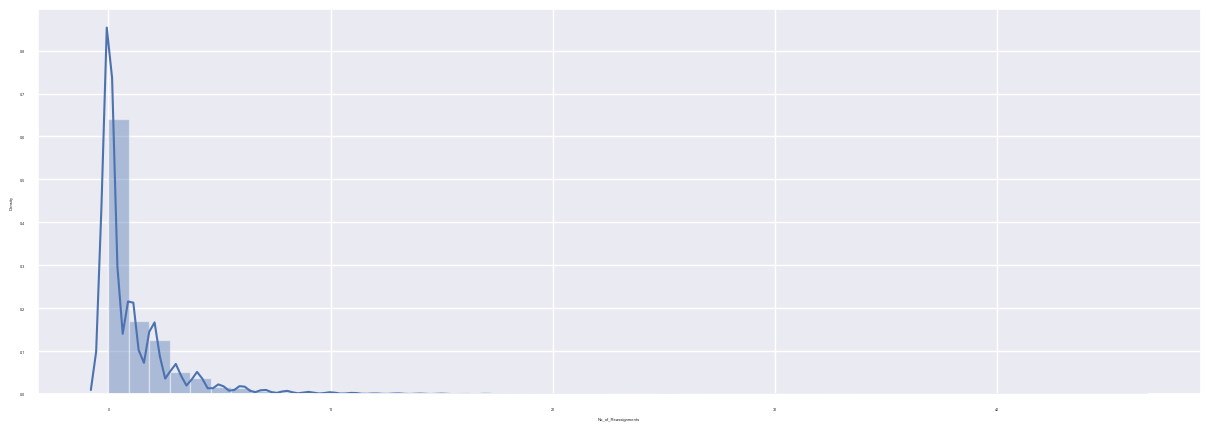

In [44]:
plt.figure(figsize=(15,5))
sb.distplot(data['No_of_Reassignments'])

<AxesSubplot:xlabel='KB_number', ylabel='Density'>

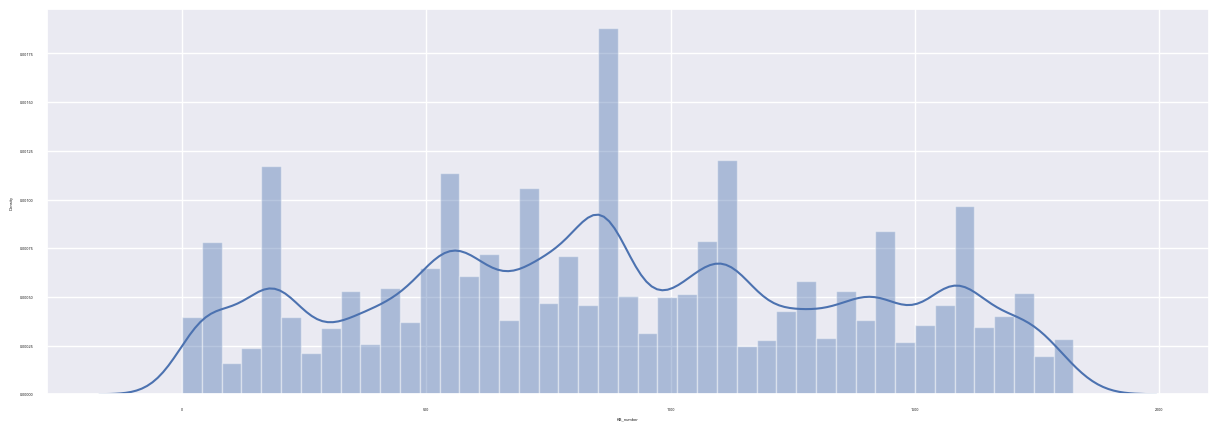

In [45]:
plt.figure(figsize=(15,5))
sb.distplot(data['KB_number'])

<AxesSubplot:xlabel='number_cnt', ylabel='Density'>

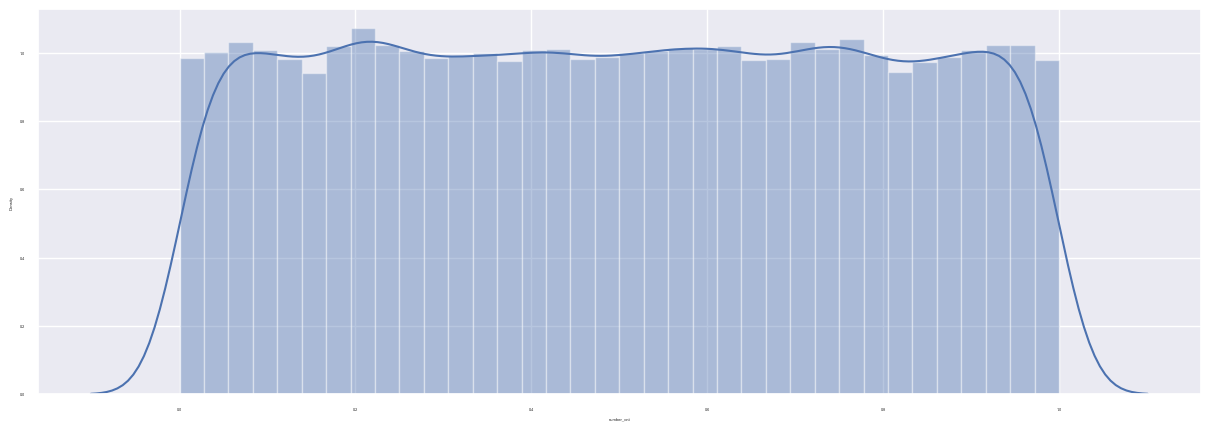

In [46]:
plt.figure(figsize=(15,5))
sb.distplot(data['number_cnt'])

In [47]:
box = data[['CI_Cat','CI_Subcat','WBS','Closure_Code','Category','No_of_Reassignments','KB_number','number_cnt','Priority']]

In [48]:
from scipy import stats
for column in box:
    print(column,'----->>',stats.skew(box[column]))

CI_Cat ----->> 1.4409593119744355
CI_Subcat ----->> -1.1651452096418613
WBS ----->> 0.8329347533493696
Closure_Code ----->> -0.3018635932598658
Category ----->> 1.580001239218896
No_of_Reassignments ----->> 4.827203703846272
KB_number ----->> 0.06622651197007731
number_cnt ----->> 0.0026244800372290018
Priority ----->> -0.5282579533958862


In [49]:
for column in box:
    print(column,'----->>',(box[column]).kurt())

CI_Cat ----->> 0.22217476067048647
CI_Subcat ----->> 0.060288704516786584
WBS ----->> -0.6620455451962179
Closure_Code ----->> -0.6375179224189256
Category ----->> 0.5022441865967848
No_of_Reassignments ----->> 41.841751446816424
KB_number ----->> -0.9705326455875287
number_cnt ----->> -1.2005353157327727
Priority ----->> -0.15682399828887572


## Identify the independent and dependent variable

In [50]:
X = data[['CI_Cat','CI_Subcat','WBS','Closure_Code','Category','No_of_Reassignments','KB_number','number_cnt']]
y = data.Priority

## Splitting the dataset to Train and Test

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [52]:
X_train.shape

(37284, 8)

In [53]:
X_test.shape

(9322, 8)

In [54]:
y_train.shape

(37284,)

In [55]:
y_test.shape

(9322,)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Logistic Regression Algorithm

In [58]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0) 
LR.fit(X_train, y_train) 
y_pred1 = LR.predict(X_test) 

# Accuracy
acc_LR = accuracy_score(y_test,y_pred1)*100

print('Accuracy of Logistic Regression:', '%.2f'%acc_LR)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred1))
print("Classification_report :")
print(classification_report(y_test, y_pred1)) 

Accuracy of Logistic Regression: 63.26
Confusion_matrix :
[[   0    0    0    1    0]
 [   0    0   97   47    5]
 [   0    1  101 1207   55]
 [   0    1  203 4190  149]
 [   0    0   35 1624 1606]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00       149
         3.0       0.23      0.07      0.11      1364
         4.0       0.59      0.92      0.72      4543
         5.0       0.88      0.49      0.63      3265

    accuracy                           0.63      9322
   macro avg       0.34      0.30      0.29      9322
weighted avg       0.63      0.63      0.59      9322



### k-Nearest Neighbors Algorithm

In [59]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train) 
y_pred2 = KNN.predict(X_test) 

# Accuracy
acc_KNN = accuracy_score(y_test,y_pred2)*100

print('accuracy of k-nearest neighbors:', '%.2f'%acc_KNN)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred2))
print("Classification_report :")
print(classification_report(y_test, y_pred2))

accuracy of k-nearest neighbors: 79.52
Confusion_matrix :
[[   0    0    1    0    0]
 [   0   66   27   45   11]
 [   0   36  832  370  126]
 [   0   40  261 3936  306]
 [   0    5  102  579 2579]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.45      0.44      0.45       149
         3.0       0.68      0.61      0.64      1364
         4.0       0.80      0.87      0.83      4543
         5.0       0.85      0.79      0.82      3265

    accuracy                           0.80      9322
   macro avg       0.56      0.54      0.55      9322
weighted avg       0.79      0.80      0.79      9322



### Support Vector Machine Algorithm

In [60]:
from sklearn.svm import SVC

SVM = SVC(random_state=0) 
SVM.fit(X_train, y_train) 
y_pred3 = SVM.predict(X_test) 

# Accuracy
acc_SVM = accuracy_score(y_test,y_pred3)*100

print('accuracy of Support Vector Machine:', '%.2f'%acc_SVM)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred3))
print("Classification_report :")
print(classification_report(y_test, y_pred3)) 

accuracy of Support Vector Machine: 76.11
Confusion_matrix :
[[   0    0    1    0    0]
 [   0   93    6   40   10]
 [   0   39  546  672  107]
 [   0   45  140 4166  192]
 [   0    5   56  914 2290]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.51      0.62      0.56       149
         3.0       0.73      0.40      0.52      1364
         4.0       0.72      0.92      0.81      4543
         5.0       0.88      0.70      0.78      3265

    accuracy                           0.76      9322
   macro avg       0.57      0.53      0.53      9322
weighted avg       0.77      0.76      0.75      9322



### Naive Bayes Bernoulli Algorithm

In [61]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB() 
NB.fit(X_train, y_train)
y_pred4 = NB.predict(X_test) 

# Accuracy
acc_NB = accuracy_score(y_test,y_pred4)*100

print('accuracy of Naive Bayes Bernoulli:', '%.2f'%acc_NB)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred4))
print("Classification_report :")
print(classification_report(y_test, y_pred4)) 

accuracy of Naive Bayes Bernoulli: 41.33
Confusion_matrix :
[[   0    0    0    1    0]
 [  13  100   11   21    4]
 [ 125  120  108  943   68]
 [1894  133  328 1996  192]
 [ 555   44  140  877 1649]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.25      0.67      0.37       149
         3.0       0.18      0.08      0.11      1364
         4.0       0.52      0.44      0.48      4543
         5.0       0.86      0.51      0.64      3265

    accuracy                           0.41      9322
   macro avg       0.36      0.34      0.32      9322
weighted avg       0.59      0.41      0.48      9322



## Decision Tree Algorithm

In [62]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train) 
y_pred1 = DT.predict(X_test) 

# Accuracy
acc_DT = accuracy_score(y_test,y_pred1)*100

print('accuracy of Decision Tree:', '%.2f'%acc_DT)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred1))
print("Classification_report :")
print(classification_report(y_test, y_pred1)) 

accuracy of Decision Tree: 85.63
Confusion_matrix :
[[   0    1    0    0    0]
 [   0   59   34   45   11]
 [   0   39 1024  218   83]
 [   0   47  211 4017  268]
 [   0   16   85  282 2882]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.36      0.40      0.38       149
         3.0       0.76      0.75      0.75      1364
         4.0       0.88      0.88      0.88      4543
         5.0       0.89      0.88      0.89      3265

    accuracy                           0.86      9322
   macro avg       0.58      0.58      0.58      9322
weighted avg       0.86      0.86      0.86      9322



## Random Forest Algorithm

In [63]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train) 
y_pred2 = RF.predict(X_test)

# Accuracy
acc_RF = accuracy_score(y_test,y_pred2)*100

print('accuracy of Random Forest:', '%.2f'%acc_RF)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred2))
print("Classification_report :")
print(classification_report(y_test, y_pred2)) 

accuracy of Random Forest: 86.54
Confusion_matrix :
[[   0    0    1    0    0]
 [   0   53   32   54   10]
 [   0   36  994  259   75]
 [   0   32  144 4153  214]
 [   0    8   67  323 2867]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.41      0.36      0.38       149
         3.0       0.80      0.73      0.76      1364
         4.0       0.87      0.91      0.89      4543
         5.0       0.91      0.88      0.89      3265

    accuracy                           0.87      9322
   macro avg       0.60      0.58      0.59      9322
weighted avg       0.86      0.87      0.86      9322



## Xgboost Algorithm

In [69]:
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)
y_pred3 = XGB.predict(X_test)

# Accuracy
acc_XGB = accuracy_score(y_test,y_pred3)*100

print('accuracy of xgboost:', '%.2f'%acc_XGB)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred3))
print("Classification_report :")
print(classification_report(y_test, y_pred3))

accuracy of xgboost: 3.98
Confusion_matrix :
[[   0    1    0    0    0]
 [  93   13   31   12    0]
 [  30 1052  224   58    0]
 [  35   77 4297  134    0]
 [   6   42  263 2954    0]]
Classification_report :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.01      0.09      0.02       149
         3.0       0.05      0.16      0.07      1364
         4.0       0.04      0.03      0.03      4543
         5.0       0.00      0.00      0.00      3265

    accuracy                           0.04      9322
   macro avg       0.02      0.06      0.03      9322
weighted avg       0.03      0.04      0.03      9322



## Accuracy of model

In [68]:
acc=[acc_LR,acc_KNN,acc_SVM,acc_NB,acc_DT,acc_RF,acc_XGB]
algorithm=['Logistic Regression','k-Nearest Neighbors','Support Vector Machine','Naive Bayes Bernoulli','Decision Tree','Random Forest','Xgboost']
for i in  range(len(acc)):
    print(algorithm[i],'has accuracy:','%.2f'%acc[i],'%')

Logistic Regression has accuracy: 63.26 %
k-Nearest Neighbors has accuracy: 79.52 %
Support Vector Machine has accuracy: 76.11 %
Naive Bayes Bernoulli has accuracy: 41.33 %
Decision Tree has accuracy: 85.63 %
Random Forest has accuracy: 86.54 %
Xgboost has accuracy: 3.98 %
